<a href="https://colab.research.google.com/github/Yash-coder-alt/Level_2_Task_/blob/main/Restaurant_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the dataset
file_path = 'Dataset .csv'  # Update this if needed
df = pd.read_csv(file_path)



In [3]:
# Display dataset info and head
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch 

<ipython-input-4-bc2928ec74ef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


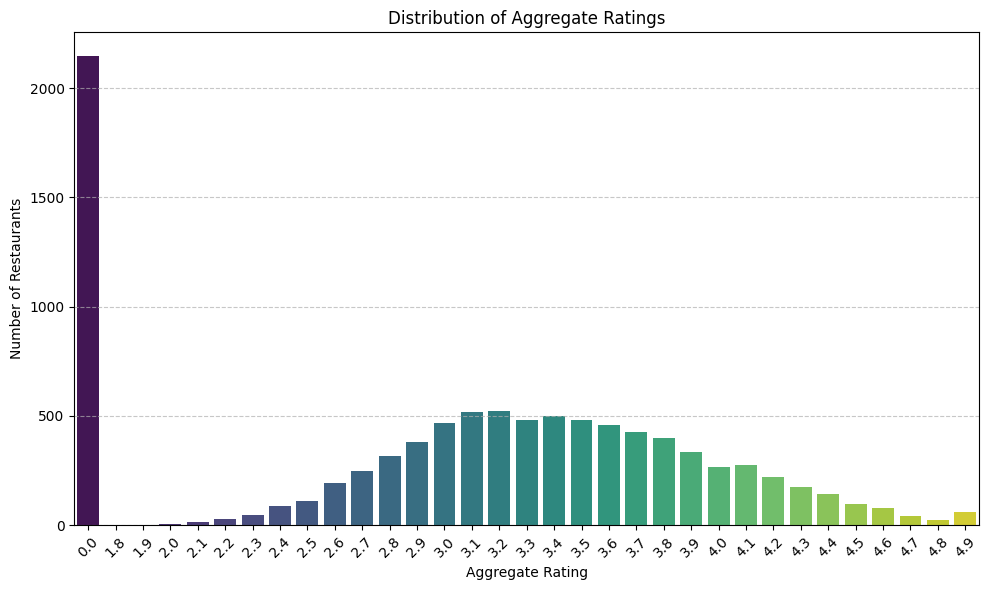

In [4]:
# --- 1. Distribution of Aggregate Ratings ---
rating_counts = df['Aggregate rating'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [5]:
# --- 2. Average Number of Votes ---
average_votes = df['Votes'].mean()
print(f"\nAverage number of votes received by restaurants: {average_votes:.2f}")




Average number of votes received by restaurants: 156.91


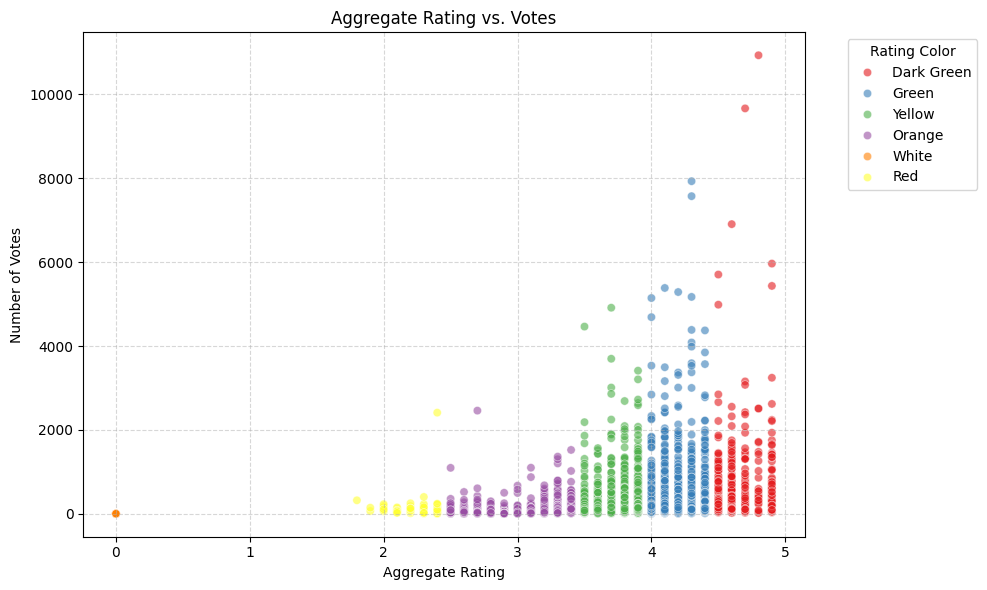

In [6]:
# --- 3. Rating vs Votes Scatter Plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Aggregate rating', y='Votes', hue='Rating color', alpha=0.6, palette='Set1')
plt.title('Aggregate Rating vs. Votes')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Votes')
plt.legend(title='Rating Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



<ipython-input-7-12708260bc3f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg_rating.values, y=city_avg_rating.index, palette='coolwarm')


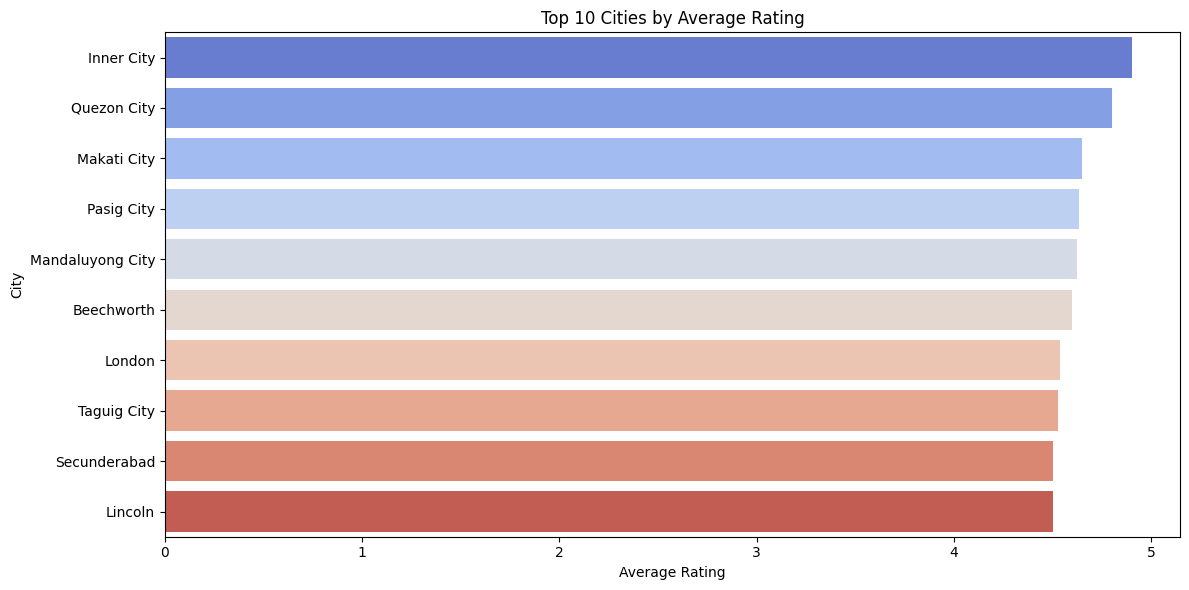

In [7]:
# --- 4. Top Cities by Average Rating (filter out zero ratings) ---
city_avg_rating = df[df['Aggregate rating'] > 0].groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=city_avg_rating.values, y=city_avg_rating.index, palette='coolwarm')
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.tight_layout()
plt.show()




<ipython-input-8-4ce303e4bb03>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='magma')


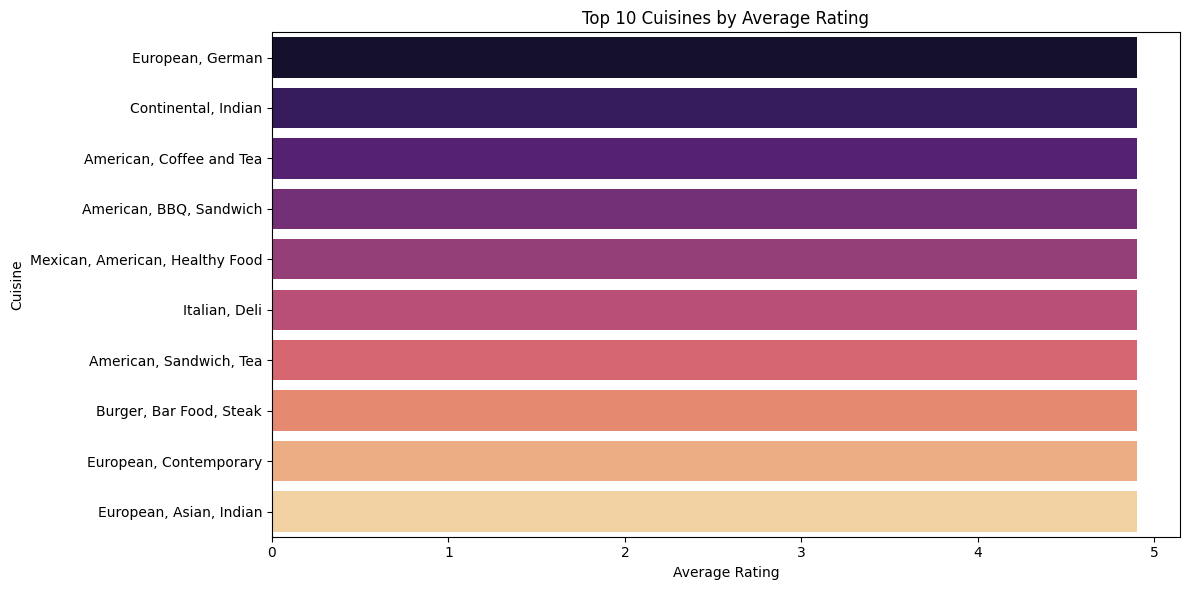

In [8]:
# --- 5. Top Cuisines by Average Rating (filter out NaNs and zero ratings) ---
top_cuisines = df[df['Aggregate rating'] > 0].dropna(subset=['Cuisines'])
cuisine_ratings = top_cuisines.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='magma')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()